## Exploratory Data Analysis on 'home-credit-default-risk' data

### This program uses the dataset "application_train.csv"available at "https://www.kaggle.com/c/home-credit-default-risk/data"

                                        

In [27]:
# Importing necessary libraries

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Customizing figure features

plt.style.use('seaborn-paper')
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
plt.rcParams.update(plt.rcParamsDefault) 

In [16]:
#Setting the filepath and importing the dataset

os.chdir("/Users/ratulnandy/Documents/GitHub/assignment_1-1-ratul-nandy/Module_1")
df = pd.read_csv('application_train.csv')

Variable 1 : AMT_INCOME_TOTAL

Income is definitely the most important variable. The eligibility of credit is always proportional to the total income. The below graph shows a "Credit Vs Annual Income" relation. The plot shows that repayment difficulties are more in the relatively lower income group 
    

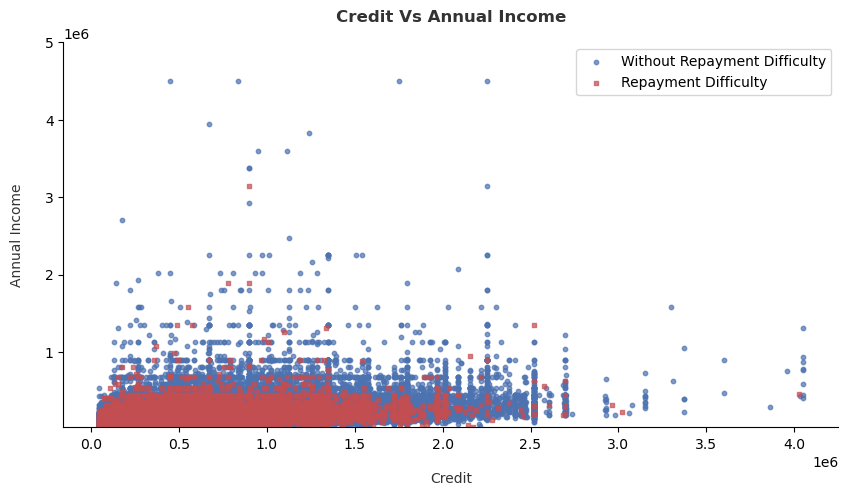

In [17]:
# The following code plots a graph "Credit Vs Annual Income"

# Extracting the required columns for plotting

df_income = df[['AMT_CREDIT','AMT_INCOME_TOTAL','TARGET']]

# Splitting the dataset based on Column "Target"
# The red squares in the graph represent people with repayment difficulties
# The blue dots in the graph represents people without repayment difficulties

df_income_T1 = df_income.loc[df_income['TARGET'] == 1]
df_income_T0 = df_income.loc[df_income['TARGET'] == 0]
x_credit_T1= df_income_T1[['AMT_CREDIT']]
y_income_T1= df_income_T1[['AMT_INCOME_TOTAL']]
x_credit_T0= df_income_T0[['AMT_CREDIT']]
y_income_T0= df_income_T0[['AMT_INCOME_TOTAL']]

# The following codes are for plotting the graph and customization

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x_credit_T0, y_income_T0, alpha=0.70, s=10, c='b', marker="o", label='Without Repayment Difficulty')
ax.scatter(x_credit_T1, y_income_T1, alpha=0.70, s=10, c='r', marker="s", label='Repayment Difficulty')
ax.set_title("Credit Vs Annual Income", pad=15, color='#333333',weight='bold')
ax.set_xlabel("Credit",labelpad=15, color='#333333')
ax.set_ylabel("Annual Income",labelpad=15, color='#333333')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()
plt.ylim([25000, 5000000])
plt.show()

Variable 2 : NAME_CONTRACT_TYPE

Contract Type is also an important variable for the analysis. There are two types of contract types present in the dataset. Upon analyzing it is found that Cash loan is significantly higher than Revolving Loans. The below graph shows a comparision between the two and splitting the data based on repayment difficulties.

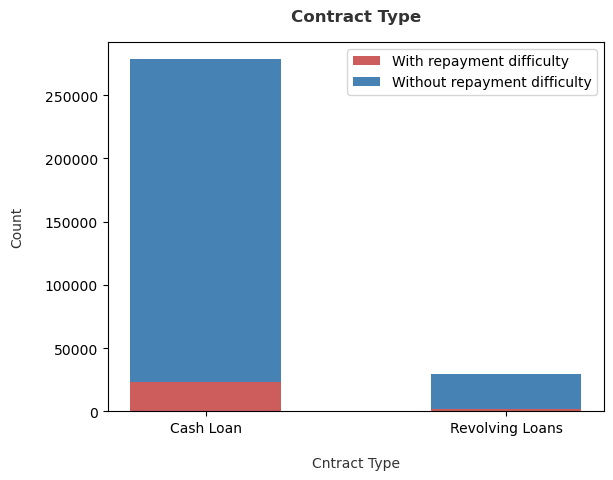

In [22]:
# The following code plots a graph based on "Contract Type"

# Extracting the required columns for plotting

df_contract = df[['TARGET','NAME_CONTRACT_TYPE']]

# Splitting the dataset based on Column "Target"
# The red part in the graph represent people with repayment difficulties
# The blue part in the graph represents people without repayment difficulties

df_cash_T1 = df_contract.loc[(df_contract['NAME_CONTRACT_TYPE'] == "Cash loans") & (df_contract['TARGET'] == 1)]
df_cash_T0 = df_contract.loc[(df_contract['NAME_CONTRACT_TYPE'] == "Cash loans") & (df_contract['TARGET'] == 0)]
df_revolve_T1 = df_contract.loc[(df_contract['NAME_CONTRACT_TYPE'] == "Revolving loans") & (df_contract['TARGET'] == 1)]
df_revolve_T0 = df_contract.loc[(df_contract['NAME_CONTRACT_TYPE'] == "Revolving loans") & (df_contract['TARGET'] == 0)]

#Building the stack for the stack graph 

defaulter = [df_cash_T1.shape[0],df_revolve_T1.shape[0]]
nondefaulter = [df_cash_T0.shape[0],df_revolve_T0.shape[0]]
xcontract = ['Cash Loan', 'Revolving Loans' ]

# The following codes are for plotting the graph and customization

plt.bar(xcontract, defaulter, 0.5, color='indianred', label = "With repayment difficulty")
plt.bar(xcontract, nondefaulter, 0.5, bottom = defaulter, color='steelblue', label = "Without repayment difficulty")
plt.xlabel("Cntract Type",labelpad=15, color='#333333')
plt.ylabel("Count", labelpad=15, color='#333333')
plt.title("Contract Type", pad=15, color='#333333',weight='bold')
plt.legend()
plt.show()

Variable 3 : AMT_CREDIT

Credit amount is a key variable for determinig a predictive model. The past credit amount history can be useful to produce a lot of insight to biuld the model. The below graph shows a plot of "Credit Vs Good Price".
Ideally both the variables should be proportional. A higher good price with low credit can be safer than a high price good with higher credit. This can predict the repayment capability of the person. 

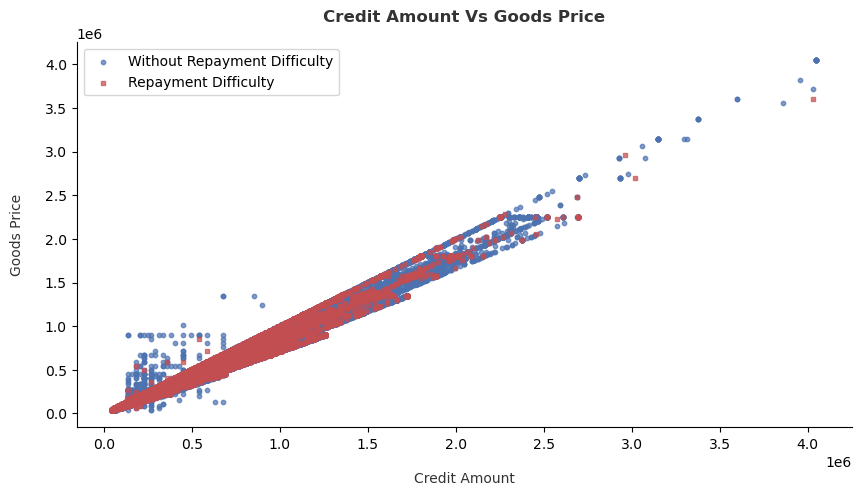

In [26]:
# The following code plots a graph based on "Credit Amount Vs Goods Price"

# Extracting the required columns for plotting

df_credit = df[['AMT_CREDIT','AMT_GOODS_PRICE','TARGET']]

# Splitting the dataset based on Column "Target"
# The red squares in the graph represent people with repayment difficulties
# The blue dots in the graph represents people without repayment difficulties

df_credit_T1 = df_credit.loc[df_credit['TARGET'] == 1]
df_credit_T0 = df_credit.loc[df_credit['TARGET'] == 0]
x_credit_T1 = df_credit_T1[['AMT_CREDIT']]
y_goods_T1 = df_credit_T1[['AMT_GOODS_PRICE']]
x_credit_T0 = df_credit_T0[['AMT_CREDIT']]
y_goods_T0 = df_credit_T0[['AMT_GOODS_PRICE']]

# The following codes are for plotting the graph and customization

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x_credit_T0, y_goods_T0, alpha=0.70, s=10, c='b', marker="o", label='Without Repayment Difficulty')
ax.scatter(x_credit_T1, y_goods_T1, alpha=0.70, s=10, c='r', marker="s", label='Repayment Difficulty')
ax.set_title("Credit Amount Vs Goods Price", pad=15, color='#333333',weight='bold')
ax.set_xlabel("Credit Amount",labelpad=15, color='#333333')
ax.set_ylabel("Goods Price",labelpad=15, color='#333333')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()
plt.show()

Variable 4: FLAG_OWN_CAR

Car ownership can be a important variable. Most people buy car by either leasing or financing. So a car ownership can help build a good credit history. From the graph it seems that the number of request for credit without a car ownership is significantly higher than the ones with car ownership.

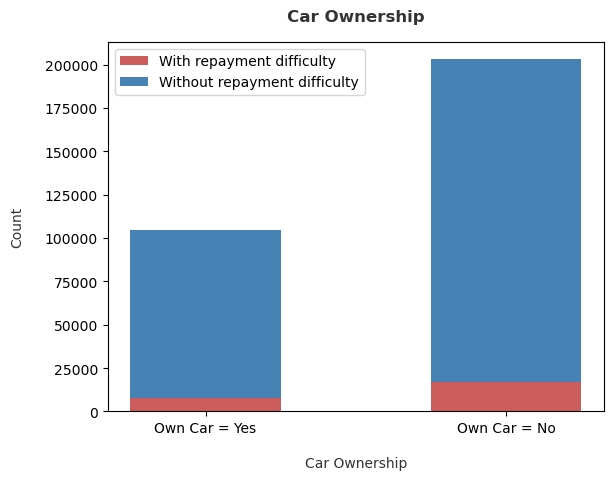

In [31]:
# The following code plots a graph based on "Car Ownership"

# Extracting the required columns for plotting

df_car = df[['TARGET','FLAG_OWN_CAR']]

# Splitting the dataset based on Column "Target"
# The red part in the graph represent people with repayment difficulties
# The blue part in the graph represents people without repayment difficulties

df_ncar_T1 = df_car.loc[(df_car['FLAG_OWN_CAR'] == 'N') & (df_car['TARGET'] == 1)]
df_ncar_T0 = df_car.loc[(df_car['FLAG_OWN_CAR'] == 'N') & (df_car['TARGET'] == 0)]
df_ycar_T1 = df_car.loc[(df_car['FLAG_OWN_CAR'] == 'Y') & (df_car['TARGET'] == 1)]
df_ycar_T0 = df_car.loc[(df_car['FLAG_OWN_CAR'] == 'Y') & (df_car['TARGET'] == 0)]

#Building the stack for the stack graph 

defaulter = [df_ycar_T1.shape[0],df_ncar_T1.shape[0]]
nondefaulter = [df_ycar_T0.shape[0],df_ncar_T0.shape[0]]
xcar = ['Own Car = Yes', 'Own Car = No' ]

# The following codes are for plotting the graph and customization

plt.bar(xcar, defaulter, 0.5, color='indianred', label = "With repayment difficulty")
plt.bar(xcar, nondefaulter, 0.5, bottom = defaulter, color='steelblue', label = "Without repayment difficulty")
plt.xlabel("Car Ownership",labelpad=15, color='#333333')
plt.ylabel("Count", labelpad=15, color='#333333')
plt.title("Car Ownership", pad=15, color='#333333',weight='bold')
plt.legend()
plt.show()

Variable 5 : DAYS_BIRTH

Age is another critical variable. Generally people who are older will have a longer work history and are expected to be in a better financial position. The below graph plots the age against employement history. It is observed that people with longer work history are less likely to default.

Note : There were few junk values in the data which had to be discarded.

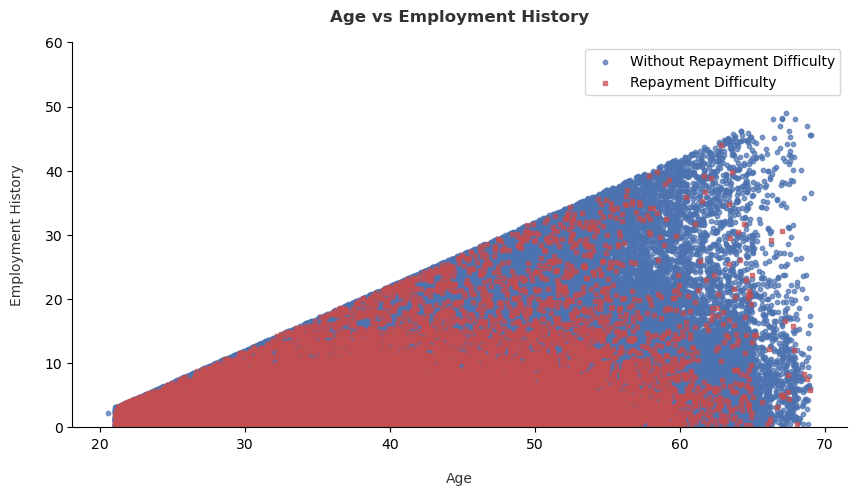

In [32]:
# The following code plots a graph based on "Age vs Employment History"

# Extracting the required columns for plotting

df_age = df[['TARGET','DAYS_BIRTH','DAYS_EMPLOYED']]

# Splitting the dataset based on Column "Target"
# The red squares in the graph represent people with repayment difficulties
# The blue dots in the graph represents people without repayment difficulties

df_age_T1 = df_age.loc[df_age['TARGET'] == 1]
df_age_T0 = df_age.loc[df_age['TARGET'] == 0]
df_age_cal_T1 = df_age_T1[['DAYS_BIRTH']]
df_age_cal_T1 = abs((df_age_cal_T1/365))
df_emp_cal_T1 = df_age_T1[['DAYS_EMPLOYED']]
df_emp_cal_T1 = abs((df_emp_cal_T1/365))
df_age_cal_T0 = df_age_T0[['DAYS_BIRTH']]
df_age_cal_T0 = abs((df_age_cal_T0/365))
df_emp_cal_T0 = df_age_T0[['DAYS_EMPLOYED']]
df_emp_cal_T0 = abs((df_emp_cal_T0/365))

# The following codes are for plotting the graph and customization

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df_age_cal_T0, df_emp_cal_T0, alpha=0.70, s=10, c='b', marker="o", label='Without Repayment Difficulty')
ax.scatter(df_age_cal_T1, df_emp_cal_T1, alpha=0.70, s=10, c='r', marker="s", label='Repayment Difficulty')
ax.set_title("Age vs Employment History", pad=15, color='#333333',weight='bold')
ax.set_xlabel("Age",labelpad=15, color='#333333')
ax.set_ylabel("Employment History",labelpad=15, color='#333333')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()
plt.ylim(0, 60)
plt.show()

Variable 6 : NAME_EDUCATION_TYPE
    
Education background is also an important variable. People with higher education are expected to earn more as a result their repayment capability will be better. In below graph it is observed that people with education background of "Secondary / secondary special" has most number of requests. The below graph shows a split of the dataset based on the educational background and corresponding repayment difficulties.     

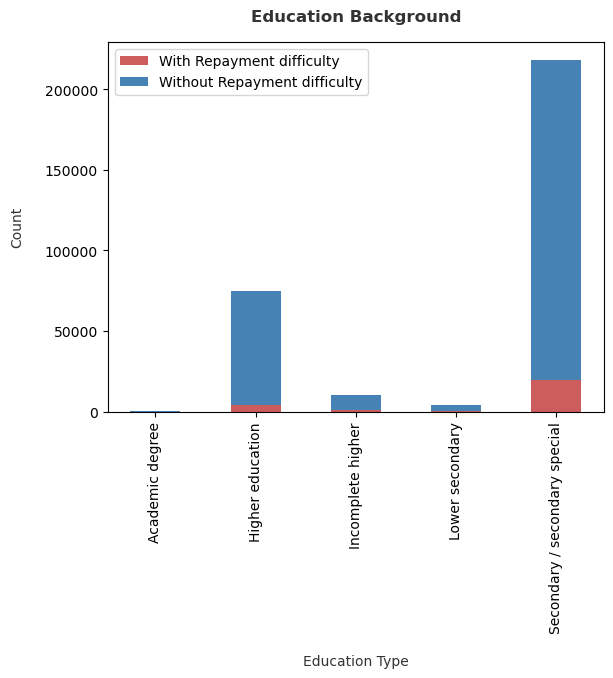

In [44]:
# The following code plots a graph based on "Education Background"

# Extracting the required columns for plotting

df_edu = df[['TARGET','NAME_EDUCATION_TYPE']]

# Splitting the dataset based on Column "Target"
# The red part in the graph represent people with repayment difficulties
# The blue part in the graph represents people without repayment difficulties

df_academic_T1 = df_edu.loc[(df_edu['NAME_EDUCATION_TYPE'] == "Academic degree") & (df_edu['TARGET'] == 1)]
df_academic_T0 = df_edu.loc[(df_edu['NAME_EDUCATION_TYPE'] == "Academic degree") & (df_edu['TARGET'] == 0)]
df_highedu_T1 = df_edu.loc[(df_edu['NAME_EDUCATION_TYPE'] == "Higher education") & (df_edu['TARGET'] == 1)]
df_highedu_T0 = df_edu.loc[(df_edu['NAME_EDUCATION_TYPE'] == "Higher education") & (df_edu['TARGET'] == 0)]
df_incomp_T1 = df_edu.loc[(df_edu['NAME_EDUCATION_TYPE'] == "Incomplete higher") & (df_edu['TARGET'] == 1)]
df_incomp_T0 = df_edu.loc[(df_edu['NAME_EDUCATION_TYPE'] == "Incomplete higher") & (df_edu['TARGET'] == 0)]
df_lower_T1 = df_edu.loc[(df_edu['NAME_EDUCATION_TYPE'] == "Lower secondary") & (df_edu['TARGET'] == 1)]
df_lower_T0 = df_edu.loc[(df_edu['NAME_EDUCATION_TYPE'] == "Lower secondary") & (df_edu['TARGET'] == 0)]
df_second_T1 = df_edu.loc[(df_edu['NAME_EDUCATION_TYPE'] == "Secondary / secondary special") & (df_edu['TARGET'] == 1)]
df_second_T0 = df_edu.loc[(df_edu['NAME_EDUCATION_TYPE'] == "Secondary / secondary special") & (df_edu['TARGET'] == 0)]

#Building the stack for the stack graph

defaulter = [df_academic_T1.shape[0],df_highedu_T1.shape[0],df_incomp_T1.shape[0],df_lower_T1.shape[0],df_second_T1.shape[0]]
nondefaulter = [df_academic_T0.shape[0],df_highedu_T0.shape[0],df_incomp_T0.shape[0],df_lower_T0.shape[0],df_second_T0.shape[0]]
xedu = ["Academic degree", "Higher education", "Incomplete higher", "Lower secondary", "Secondary / secondary special"]

# The following codes are for plotting the graph and customization

plt.bar(xedu, defaulter, 0.5, color='indianred', label = "With Repayment difficulty")
plt.bar(xedu, nondefaulter, 0.5, bottom = defaulter, color='steelblue', label = "Without Repayment difficulty")
plt.xlabel("Education Type",labelpad=15, color='#333333')
plt.xticks(rotation=90)
plt.ylabel("Count", labelpad=15, color='#333333')
plt.title("Education Background", pad=15, color='#333333',weight='bold')
plt.legend()
plt.show()

Variable 7 : NAME_INCOME_TYPE

The source of income is another important factor that should be considered while building the model. If a person is working, then he/she has a higher chance of repayment compared to someone who is unemployed or student. The following graph shows the distribution of the dataset based on income type

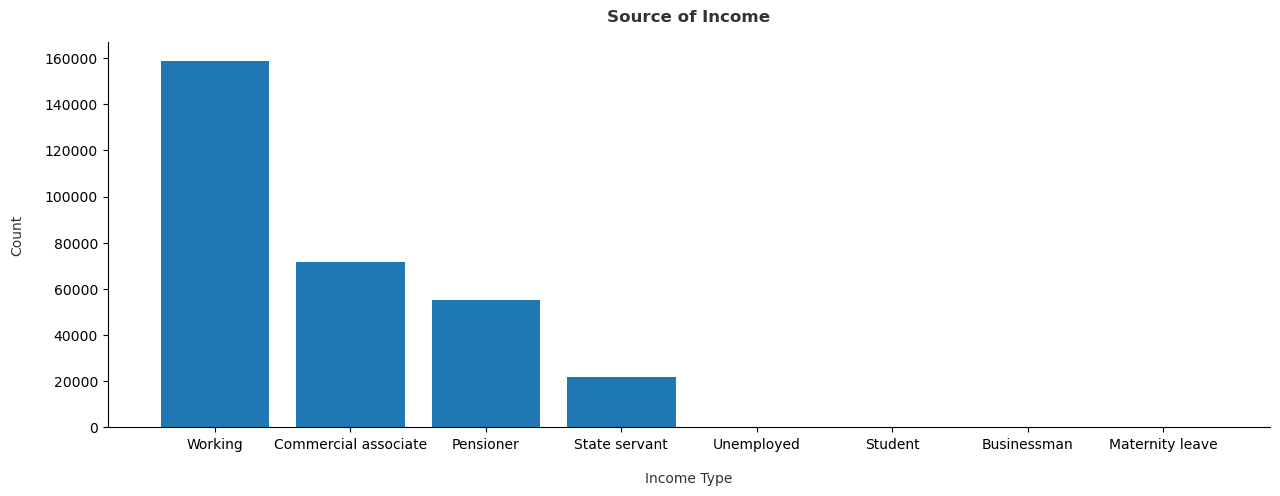

In [45]:
# The following code plots a graph based on "Source of income"

# Extracting the required columns for plotting

incometypecnt = df["NAME_INCOME_TYPE"].value_counts()
incometype = df["NAME_INCOME_TYPE"].value_counts().keys()

# The following codes are for plotting the graph and customization

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(incometype, incometypecnt)
ax.set_title("Source of Income", pad=15, color='#333333',weight='bold')
ax.set_xlabel("Income Type",labelpad=15, color='#333333')
ax.set_ylabel("Count",labelpad=15, color='#333333')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Variable 8 : NAME_FAMILY_STATUS
    
Family status is also a variable that can be useful. Married people with responsibilities are expected to be better with financial aspect. The repayment chances will be higher in that case. The graph below shows a split of the data based on their family status along with their repayment difficulties.

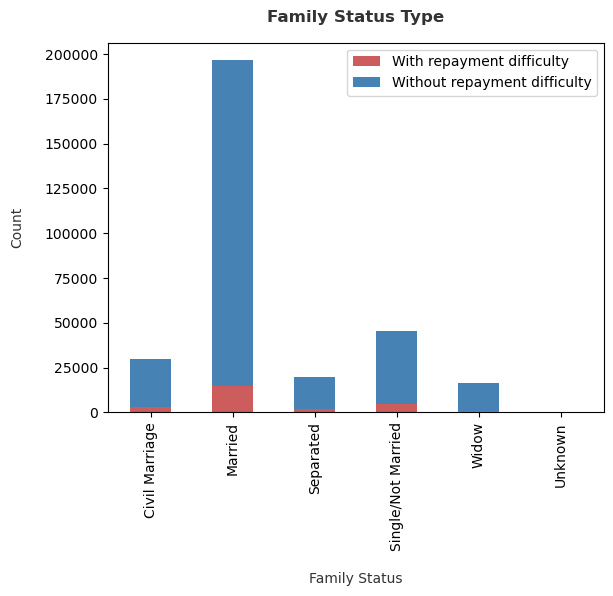

In [46]:
# The following code plots a graph based on "Family Status Type"

# Extracting the required columns for plotting

df_fam = df[['TARGET','NAME_FAMILY_STATUS']]

# Splitting the dataset based on Column "Target"
# The red part in the graph represent people with repayment difficulties
# The blue part in the graph represents people without repayment difficulties

df_civil_T1 = df_fam.loc[(df_fam['NAME_FAMILY_STATUS'] == "Civil marriage") & (df_fam['TARGET'] == 1)]
df_civil_T0 = df_fam.loc[(df_fam['NAME_FAMILY_STATUS'] == "Civil marriage") & (df_fam['TARGET'] == 0)]
df_married_T1 = df_fam.loc[(df_fam['NAME_FAMILY_STATUS'] == "Married") & (df_fam['TARGET'] == 1)]
df_married_T0 = df_fam.loc[(df_fam['NAME_FAMILY_STATUS'] == "Married") & (df_fam['TARGET'] == 0)]
df_separate_T1 = df_fam.loc[(df_fam['NAME_FAMILY_STATUS'] == "Separated") & (df_fam['TARGET'] == 1)]
df_separate_T0 = df_fam.loc[(df_fam['NAME_FAMILY_STATUS'] == "Separated") & (df_fam['TARGET'] == 0)]
df_single_T1 = df_fam.loc[(df_fam['NAME_FAMILY_STATUS'] == "Single / not married") & (df_fam['TARGET'] == 1)]
df_single_T0 = df_fam.loc[(df_fam['NAME_FAMILY_STATUS'] == "Single / not married") & (df_fam['TARGET'] == 0)]
df_widow_T1 = df_fam.loc[(df_fam['NAME_FAMILY_STATUS'] == "Widow") & (df_fam['TARGET'] == 1)]
df_widow_T0 = df_fam.loc[(df_fam['NAME_FAMILY_STATUS'] == "Widow") & (df_fam['TARGET'] == 0)]
df_unknown_T1 = df_fam.loc[(df_fam['NAME_FAMILY_STATUS'] == "Unknown") & (df_fam['TARGET'] == 1)]
df_unknown_T0 = df_fam.loc[(df_fam['NAME_FAMILY_STATUS'] == "Unknown") & (df_fam['TARGET'] == 0)]

#Building the stack for the stack graph

defaulter = [df_civil_T1.shape[0],df_married_T1.shape[0],df_separate_T1.shape[0],df_single_T1.shape[0],df_widow_T1.shape[0],df_unknown_T1.shape[0]]
nondefaulter = [df_civil_T0.shape[0],df_married_T0.shape[0],df_separate_T0.shape[0],df_single_T0.shape[0],df_widow_T0.shape[0],df_unknown_T0.shape[0]]
xfam = ["Civil Marriage", "Married", "Separated", "Single/Not Married", "Widow","Unknown"]

# The following codes are for plotting the graph and customization

plt.bar(xfam, defaulter, 0.5, color='indianred', label = "With repayment difficulty")
plt.bar(xfam, nondefaulter, 0.5, bottom = defaulter, color='steelblue', label = "Without repayment difficulty")
plt.xlabel("Family Status",labelpad=15, color='#333333')
plt.xticks(rotation=90)
plt.ylabel("Count", labelpad=15, color='#333333')
plt.title("Family Status Type", pad=15, color='#333333',weight='bold')
plt.legend()
plt.show()

Variable 9 : ORGANIZATION_TYPE
    
Organization type can also provide useful insight on the trend of the credit request. Certain sector can be more stable and certain sector can be more volatile. So this variable can provide this inputs to the predicting model. It seems Business Entity type 3 has maximum credit requests  

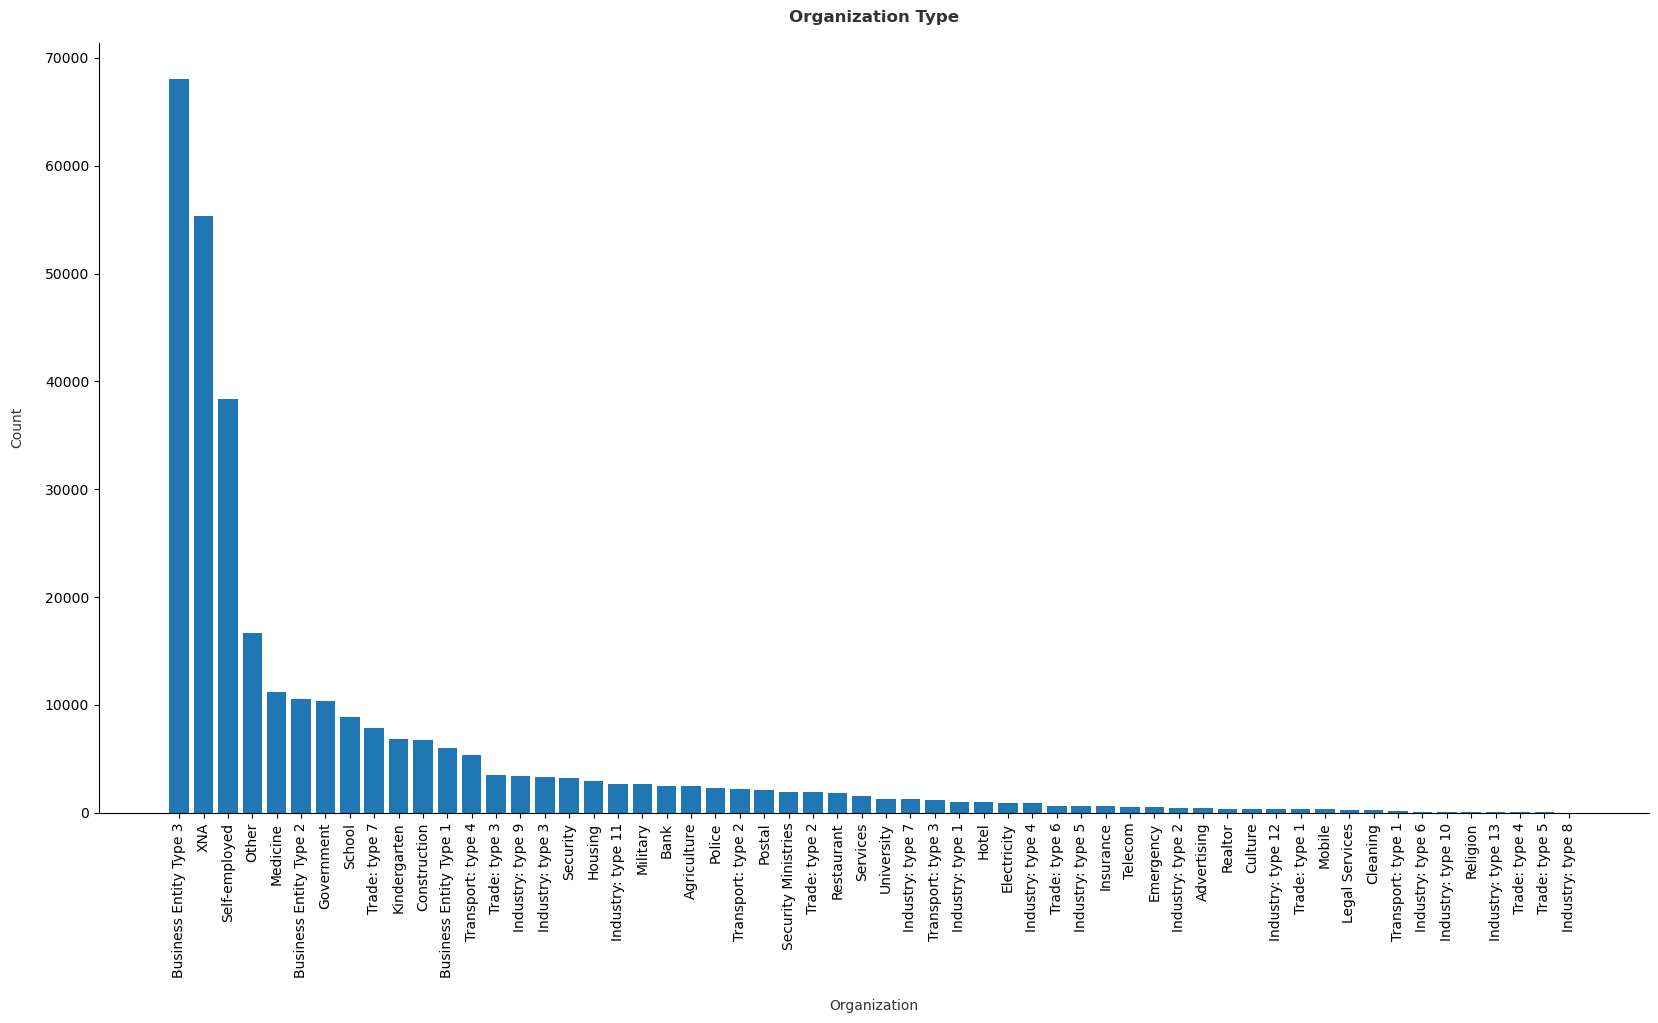

In [49]:
# The following code plots a graph based on "Organization Type"

# Extracting the required columns for plotting

deptcnt = df["ORGANIZATION_TYPE"].value_counts()
org = df["ORGANIZATION_TYPE"].value_counts().keys()

# The following codes are for plotting the graph and customization

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(org, deptcnt)
ax.set_title("Organization Type", pad=15, color='#333333',weight='bold')
ax.set_xlabel("Organization",labelpad=15, color='#333333')
ax.set_ylabel("Count",labelpad=15, color='#333333')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=90)
plt.show()


Variable 10 : AMT_ANNUITY

Annuity can also be an important variable. The anuity should be proportional to the credit amount. Any ambiguity in this matter can be used for providing input to the predicting model. The below graph contains a comparison between the credit amount and annuity.

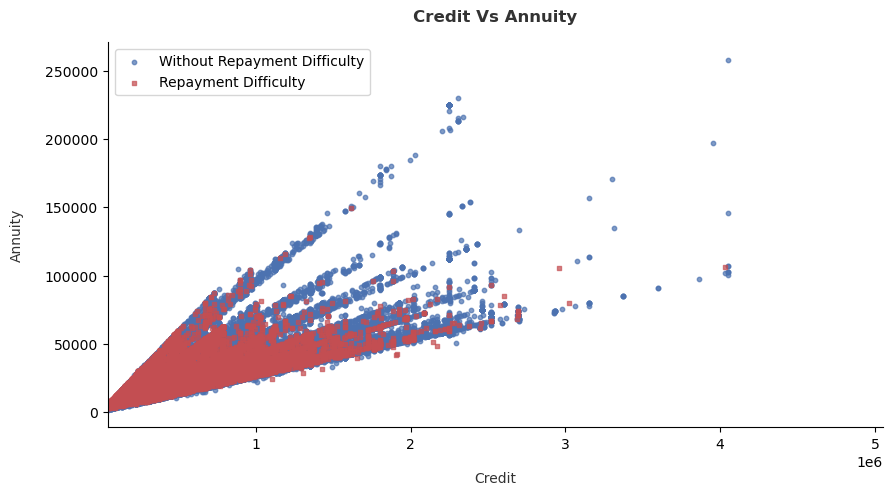

In [50]:
# The following code plots a graph based on "Credit Vs Annuity"

# Extracting the required columns for plotting

df_annuity = df[['AMT_CREDIT','AMT_ANNUITY','TARGET']]

# Splitting the dataset based on Column "Target"
# The red squares in the graph represent people with repayment difficulties
# The blue dots in the graph represents people without repayment difficulties

df_annuity_T1 = df_annuity.loc[df_annuity['TARGET'] == 1]
df_annuity_T0 = df_annuity.loc[df_annuity['TARGET'] == 0]
x_credit_T1 = df_annuity_T1[['AMT_CREDIT']]
y_annuity_T1 = df_annuity_T1[['AMT_ANNUITY']]
x_credit_T0 = df_annuity_T0[['AMT_CREDIT']]
y_annuity_T0 = df_annuity_T0[['AMT_ANNUITY']]

# The following codes are for plotting the graph and customization


fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x_credit_T0, y_annuity_T0, alpha=0.70, s=10, c='b', marker="o", label='Without Repayment Difficulty')
ax.scatter(x_credit_T1, y_annuity_T1, alpha=0.70, s=10, c='r', marker="s", label='Repayment Difficulty')
ax.set_title("Credit Vs Annuity", pad=15, color='#333333',weight='bold')
ax.set_xlabel("Credit",labelpad=15, color='#333333')
ax.set_ylabel("Annuity",labelpad=15, color='#333333')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()
plt.xlim(45000, 5050000)
plt.show()